# Data Mining Project 
*Algorithm Used : Naive Bayes classification , Linear Regression , Logistic Regression*

> 


**Team Members:**
S Kamalesh Kumar - 18MIS1080, 
Prasanna M - 18MIS1111 

# Title: Wine Quality Prediction using Classification & Regression

# importing the **modules** 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

# Loading the dataset

In [ ]:
data=pd.read_csv("/content/winequality_red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,taste,phRange,alcohol
0,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,5,Good,neutral,9
1,7.8,0.880,0.00,3,0.098,25,67.0,0.99680,3.20,0.68,5,Good,week acid,10
2,7.8,0.760,0.04,2,0.092,15,54.0,0.99700,3.26,0.65,5,Good,week acid,10
3,11.2,0.280,0.56,2,0.075,17,60.0,0.99800,3.16,0.58,6,Good,week acid,10
4,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,5,Good,neutral,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2,0.090,32,44.0,0.99490,3.45,0.58,5,Good,week acid,11
1595,5.9,0.550,0.10,2,0.062,39,51.0,0.99512,3.52,0.76,6,Good,neutral,11
1596,6.3,0.510,0.13,2,0.076,29,40.0,0.99574,3.42,0.75,6,Good,week acid,11
1597,5.9,0.645,0.12,2,0.075,32,44.0,0.99547,3.57,0.71,5,Good,neutral,10


In [ ]:
#number of instance in red wine
data.size

22386

In [ ]:
#checking the missing values in red wine
data.isnull()
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,taste,phRange,alcohol
0,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,5,Good,neutral,9
1,7.8,0.880,0.00,3,0.098,25,67.0,0.99680,3.20,0.68,5,Good,week acid,10
2,7.8,0.760,0.04,2,0.092,15,54.0,0.99700,3.26,0.65,5,Good,week acid,10
3,11.2,0.280,0.56,2,0.075,17,60.0,0.99800,3.16,0.58,6,Good,week acid,10
4,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,5,Good,neutral,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2,0.090,32,44.0,0.99490,3.45,0.58,5,Good,week acid,11
1595,5.9,0.550,0.10,2,0.062,39,51.0,0.99512,3.52,0.76,6,Good,neutral,11
1596,6.3,0.510,0.13,2,0.076,29,40.0,0.99574,3.42,0.75,6,Good,week acid,11
1597,5.9,0.645,0.12,2,0.075,32,44.0,0.99547,3.57,0.71,5,Good,neutral,10


In [ ]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
quality                 0
taste                   0
phRange                 0
alcohol                 0
dtype: int64

In [ ]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           14
chlorides               153
free sulfur dioxide      57
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
quality                   6
taste                     3
phRange                   3
alcohol                   8
dtype: int64

In [ ]:
#we are applying preprocessing technique 
# assigning 1 to good & 0 to bad 
data['winequality']=[1 if x>=6 else 0 for x in data['quality']]
X=data.drop(['quality','winequality'],axis = 1)
y=data['winequality']
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,taste,phRange,alcohol,winequality
0,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,5,Good,neutral,9,0
1,7.8,0.880,0.00,3,0.098,25,67.0,0.99680,3.20,0.68,5,Good,week acid,10,0
2,7.8,0.760,0.04,2,0.092,15,54.0,0.99700,3.26,0.65,5,Good,week acid,10,0
3,11.2,0.280,0.56,2,0.075,17,60.0,0.99800,3.16,0.58,6,Good,week acid,10,1
4,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,5,Good,neutral,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2,0.090,32,44.0,0.99490,3.45,0.58,5,Good,week acid,11,0
1595,5.9,0.550,0.10,2,0.062,39,51.0,0.99512,3.52,0.76,6,Good,neutral,11,1
1596,6.3,0.510,0.13,2,0.076,29,40.0,0.99574,3.42,0.75,6,Good,week acid,11,1
1597,5.9,0.645,0.12,2,0.075,32,44.0,0.99547,3.57,0.71,5,Good,neutral,10,0


In [ ]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,alcohol,winequality
fixed acidity,1.000000,-0.256131,0.671703,0.111856,0.093705,-0.153845,-0.113181,0.668047,-0.682978,0.183006,0.124052,-0.069457,0.095093
volatile acidity,-0.256131,1.000000,-0.552496,-0.009652,0.061298,-0.010592,0.076470,0.022026,0.234937,-0.260987,-0.390558,-0.189703,-0.321441
citric acid,0.671703,-0.552496,1.000000,0.143676,0.203823,-0.060836,0.035533,0.364947,-0.541904,0.312770,0.226373,0.088803,0.159129
residual sugar,0.111856,-0.009652,0.143676,1.000000,0.063728,0.188242,0.200452,0.357048,-0.083502,0.011681,0.008677,0.022459,-0.012272
chlorides,0.093705,0.061298,0.203823,0.063728,1.000000,0.005599,0.047400,0.200632,-0.265026,0.371260,-0.128907,-0.226898,-0.109494
free sulfur dioxide,-0.153845,-0.010592,-0.060836,0.188242,0.005599,1.000000,0.668095,-0.022154,0.070254,0.051574,-0.050520,-0.070363,-0.061635
total sulfur dioxide,-0.113181,0.076470,0.035533,0.200452,0.047400,0.668095,1.000000,0.071269,-0.066495,0.042947,-0.185100,-0.193804,-0.231963
density,0.668047,0.022026,0.364947,0.357048,0.200632,-0.022154,0.071269,1.000000,-0.341699,0.148506,-0.174919,-0.478918,-0.159110
pH,-0.682978,0.234937,-0.541904,-0.083502,-0.265026,0.070254,-0.066495,-0.341699,1.000000,-0.196648,-0.057731,0.221305,-0.003264
sulphates,0.183006,-0.260987,0.312770,0.011681,0.371260,0.051574,0.042947,0.148506,-0.196648,1.000000,0.251397,0.079568,0.218072


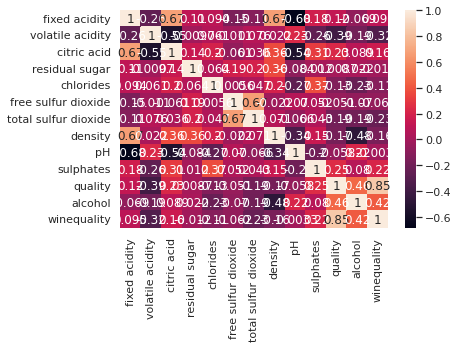

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
sns.heatmap(data.corr(),annot=True)
plt.show()

In [ ]:
#Splittig the dataset to be train and test
from sklearn.model_selection import train_test_split
x = data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
y = data['winequality']
X = pd.get_dummies(x)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,9,5
1,7.8,0.880,0.00,3,0.098,25,67.0,0.99680,3.20,0.68,10,5
2,7.8,0.760,0.04,2,0.092,15,54.0,0.99700,3.26,0.65,10,5
3,11.2,0.280,0.56,2,0.075,17,60.0,0.99800,3.16,0.58,10,6
4,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2,0.090,32,44.0,0.99490,3.45,0.58,11,5
1595,5.9,0.550,0.10,2,0.062,39,51.0,0.99512,3.52,0.76,11,6
1596,6.3,0.510,0.13,2,0.076,29,40.0,0.99574,3.42,0.75,11,6
1597,5.9,0.645,0.12,2,0.075,32,44.0,0.99547,3.57,0.71,10,5


In [ ]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: winequality, Length: 1599, dtype: int64

In [ ]:
#Train 80% , Test 20%
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.impute import SimpleImputer
i = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
pd.DataFrame(i.fit_transform(data),columns=data.columns,index=data.index)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,quality,taste,phRange,alcohol,winequality
0,7.4,0.7,0,2,0.076,11,34,0.9978,3.51,0.56,5,Good,neutral,9,0
1,7.8,0.88,0,3,0.098,25,67,0.9968,3.2,0.68,5,Good,week acid,10,0
2,7.8,0.76,0.04,2,0.092,15,54,0.997,3.26,0.65,5,Good,week acid,10,0
3,11.2,0.28,0.56,2,0.075,17,60,0.998,3.16,0.58,6,Good,week acid,10,1
4,7.4,0.7,0,2,0.076,11,34,0.9978,3.51,0.56,5,Good,neutral,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.6,0.08,2,0.09,32,44,0.9949,3.45,0.58,5,Good,week acid,11,0
1595,5.9,0.55,0.1,2,0.062,39,51,0.99512,3.52,0.76,6,Good,neutral,11,1
1596,6.3,0.51,0.13,2,0.076,29,40,0.99574,3.42,0.75,6,Good,week acid,11,1
1597,5.9,0.645,0.12,2,0.075,32,44,0.99547,3.57,0.71,5,Good,neutral,10,0


In [ ]:
onh = data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']]
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
print(enc.fit(onh))

OneHotEncoder(handle_unknown='ignore')


In [ ]:
onh

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,9,5
1,7.8,0.880,0.00,3,0.098,25,67.0,0.99680,3.20,0.68,10,5
2,7.8,0.760,0.04,2,0.092,15,54.0,0.99700,3.26,0.65,10,5
3,11.2,0.280,0.56,2,0.075,17,60.0,0.99800,3.16,0.58,10,6
4,7.4,0.700,0.00,2,0.076,11,34.0,0.99780,3.51,0.56,9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2,0.090,32,44.0,0.99490,3.45,0.58,11,5
1595,5.9,0.550,0.10,2,0.062,39,51.0,0.99512,3.52,0.76,11,6
1596,6.3,0.510,0.13,2,0.076,29,40.0,0.99574,3.42,0.75,11,6
1597,5.9,0.645,0.12,2,0.075,32,44.0,0.99547,3.57,0.71,10,5


In [ ]:
x_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
642,9.9,0.540,0.45,2,0.071,16,40.0,0.99910,3.39,0.62,9,5
679,10.8,0.260,0.45,3,0.060,20,49.0,0.99720,3.13,0.54,10,5
473,9.9,0.350,0.55,2,0.062,5,14.0,0.99710,3.26,0.79,11,5
390,5.6,0.850,0.05,1,0.045,12,88.0,0.99240,3.56,0.82,13,8
1096,6.6,0.725,0.09,6,0.117,9,17.0,0.99655,3.35,0.49,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...
763,9.3,0.655,0.26,2,0.096,5,35.0,0.99738,3.25,0.42,10,5
835,7.6,0.665,0.10,2,0.066,27,55.0,0.99655,3.39,0.51,9,5
1216,7.9,0.570,0.31,2,0.079,10,79.0,0.99677,3.29,0.69,10,6
559,13.0,0.470,0.49,4,0.085,6,47.0,1.00210,3.30,0.68,13,6


In [ ]:
y_train

642     0
679     0
473     0
390     1
1096    1
       ..
763     0
835     0
1216    1
559     1
684     0
Name: winequality, Length: 1279, dtype: int64

In [ ]:
x_train.shape

(1279, 12)

In [ ]:
y_train.shape

(1279,)

# Navie Bayes

In [ ]:
#scaling the dataset 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:

from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()#fucntion
result = clf.fit(x_train,y_train)
result

GaussianNB()

In [ ]:
#Predicting values
pred = clf.predict(x_test)
pred

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)
#Naive Bayes Test data Accuracy

0.984375

In [ ]:
pred1 = clf.predict(x_train)
pred1

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(pred1,y_train)
#Naive Bayes Train data accuracy

0.9788897576231431

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()


# Linear Regression

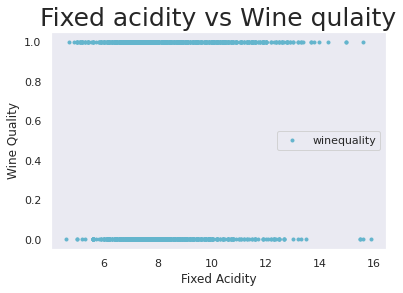

In [ ]:
#(Linear Regression)
data.plot(x='fixed acidity',y='winequality',style='.',color='c')
plt.title('Fixed acidity vs Wine qulaity',fontdict={'family':'Sans Serif','size':25})
plt.xlabel('Fixed Acidity')
plt.ylabel('Wine Quality')
plt.grid()
plt.show()

In [ ]:
# we are converting data 2D into 1D data
X=data['fixed acidity'].values.reshape(-1,1)
y=data['winequality'].values.reshape(-1,1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:

print('Intercept of the curve is:',lr.intercept_)
print('Slope of the curve is:',lr.coef_)

Intercept of the curve is: [0.28005252]
Slope of the curve is: [[0.03046025]]


In [ ]:
y_pred=lr.predict(X_test)

In [ ]:



#flatten return a copy of the array collapsed into one dimension.
data=pd.DataFrame({'Actual Value': y_test.flatten(),'Predicted Value': y_pred.flatten()})
data

,Actual Value,Predicted Value
0,1,0.609023
1,0,0.526781
2,1,0.557241
3,1,0.590747
4,0,0.651668
...,...,...
315,1,0.587701
316,0,0.490228
317,0,0.557241
318,0,0.557241


In [ ]:
pred=lr.predict(X_test)

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.4948121737880545
Mean Squared Error: 0.24867870093657723
Root Mean Squared Error: 0.4986769504765357


In [ ]:
MAE=1-metrics.mean_absolute_error(y_test,pred)
MAE

0.5051878262119456

In [ ]:
MSE=1-metrics.mean_squared_error(y_test,pred)
MSE

0.7513212990634228

In [ ]:
RMSE=1-np.sqrt(metrics.mean_squared_error(y_test, pred))
RMSE

0.5013230495234643

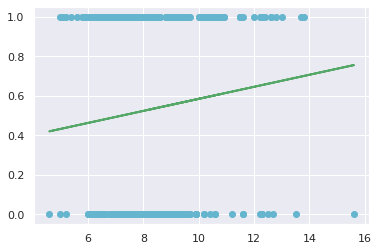

In [ ]:
plt.scatter(X_test,y_test,color='c')
plt.plot(X_test,y_pred,color='g',linewidth=2)
plt.show()
#y=mx+c Plotting the linear Regression Line

# Logistic Regression

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logis = LogisticRegression()

#Fit the model
logis.fit(x_train,y_train)

#Use for prediction
y_pred = logis.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
#if the accuracy is equal to one it is 100%
from sklearn.metrics import accuracy_score
logit_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score for the Logistic model:', logit_accuracy)

Accuracy score for the Logistic model: 1.0


In [ ]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,y_pred)

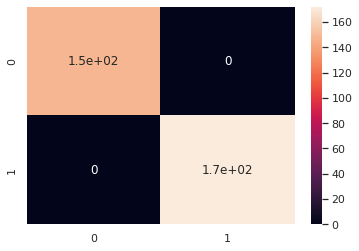

Text(0.5, 1.0, 'confusion matrix')

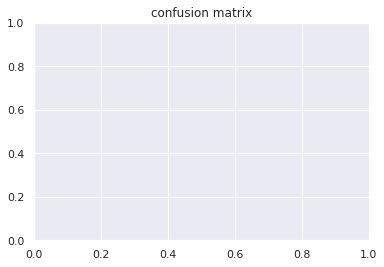

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()
sns.heatmap(confusion_matrix(y_pred,y_test),annot=True)
plt.show()
plt.title('confusion matrix')

# Support Vector Machine

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
model=SVC().fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
prediction=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
svcacc = accuracy_score(y_test,prediction)
svcacc

0.509375

In [ ]:
prediction1=model.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
svcacc1 = accuracy_score(y_train,prediction1)
svcacc1

0.5551211884284597